In [102]:
import matplotlib.pyplot as plt
from models import BDWModel, SBGModel

plt.rcParams["figure.figsize"] = (10,6)

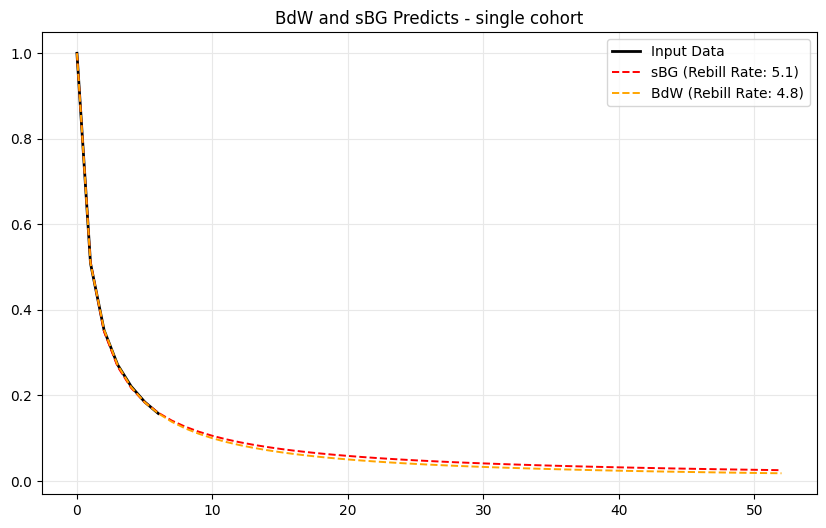

In [103]:
# Example 1 - single line fitting
sbg_model = SBGModel()
bdw_model = BDWModel()
# app 1 data
data = [1.0, 0.5091851851851852, 0.35287113708935436, 0.271995862306764, 0.22125964335399015, 0.18490485958831435, 0.1580473280050149]

sbg_predict = sbg_model.fit(data, 52)['retention_curve']
bdw_predict = bdw_model.fit(data, 52)['retention_curve']


plt.plot(data, label='Input Data', c='black', linewidth=2)
plt.plot(sbg_predict, label=f'sBG (Rebill Rate: {sum(sbg_predict):.1f})', c='red', linestyle='--', linewidth=1.4)
plt.plot(bdw_predict, label=f'BdW (Rebill Rate: {sum(bdw_predict):.1f})', c='orange', linestyle='--', linewidth=1.4)

plt.grid(color='#E8E8E8')
plt.title('BdW and sBG Predicts - single cohort')
plt.legend();


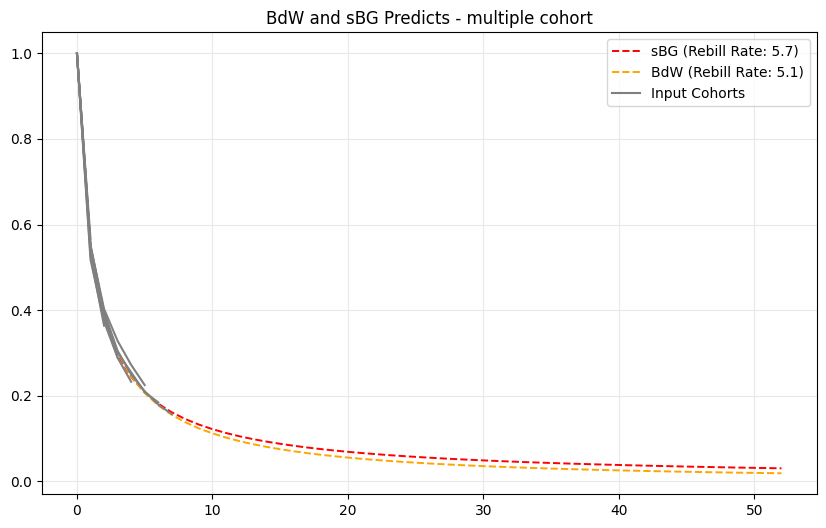

In [104]:
# Example 2 - multiple cohorts fitting
data = [ # app 2 data
  [1353.0, 748.0, 534.0, 413.0, 338.0, 285.0, 243.0, 213.0], 
  [1126.0, 617.0, 445.0, 339.0, 287.0, 235.0, 208.0], 
  [804.0, 442.0, 324.0, 264.0, 219.0, 181.0], 
  [1322.0, 685.0, 494.0, 382.0, 308.0], 
  [1129.0, 618.0, 438.0, 328.0], 
  [1033.0, 545.0, 376.0], 
  [879.0, 498.0]
]

sbg_predict = sbg_model.fit(data, 52)['retention_curve']
bdw_predict = bdw_model.fit(data, 52)['retention_curve']

plt.plot(sbg_predict, label=f'sBG (Rebill Rate: {sum(sbg_predict):.1f})', c='red', linestyle='--', linewidth=1.4)
plt.plot(bdw_predict, label=f'BdW (Rebill Rate: {sum(bdw_predict):.1f})', c='orange', linestyle='--', linewidth=1.4)

for i, cohort in enumerate(data):
  normalized_cohort = [value / cohort[0] for value in cohort]
  plt.plot(normalized_cohort, color='gray', label='Input Cohorts' if i == 0 else '')
  

plt.grid(color='#E8E8E8')
plt.title('BdW and sBG Predicts - multiple cohort')
plt.legend();